In [3]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage
from transformers import ClapAudioModelWithProjection
from datasets import load_dataset

In [2]:
dataset = load_dataset("ashraq/esc50")

/scratch/snormanh_lab/shared/miniforge3/envs/py39/lib/python3.9/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
model = ClapAudioModelWithProjection.from_pretrained("laion/larger_clap_general")

dataset = load_dataset("ashraq/esc50")
audio_sample = dataset["train"]["audio"][0]["array"]


config.json:   0%|          | 0.00/643 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/776M [00:00<?, ?B/s]

/scratch/snormanh_lab/shared/miniforge3/envs/py39/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/scratch/snormanh_lab/shared/miniforge3/envs/py39/lib/python3.9/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


In [4]:

#read /home/gliao2/samlab_Sigurd/feature_extration/data/test/coch_audsr20000_nfilts29_lofreq50_over1_exp0.3_envsr100_freqsr24_tpad3_outsr100/coch_stim1_section1_fast-seg180.mat
mat = hdf5storage.loadmat('/home/gliao2/samlab_Sigurd/feature_extration/data/test/mod_tprate-4.00-1.00-2.00-4.00-8.00-16.00-32.00-64.00-128.00_tplow100000000_sprate-1.00-0.25-0.50-1.00-2.00-4.00-8.00_splow1000000_fpad8_caus0_coch_audsr20000_nfilts29_lofreq50_over1_exp0.3_envsr100_freqsr24_tpad3_outsr100/spectempmod_modulus_stim1_section1_fast-seg180.mat')
spec_from_sam = mat['F']

In [6]:
coch = F_struct['coch']
P_coch = F_struct['P']
spec = eng.get_spectrogram_from_coch(coch,P_coch)

In [13]:
coch_from_sam = hdf5storage.loadmat('/home/gliao2/samlab_Sigurd/feature_extration/data/test/coch_audsr20000_nfilts29_lofreq50_over1_exp0.3_envsr100_freqsr24_tpad3_outsr100/coch_stim1_section1_fast-seg180.mat')['coch']
coch = np.array(coch)
coch_from_sam = np.array(coch_from_sam)

In [8]:
spec = np.array(spec)
spec_from_sam = np.array(spec_from_sam)
print(spec.shape)
print(spec_from_sam.shape)

(4400, 185, 7, 9)
(4400, 185, 7, 9, 2)


In [11]:
spec1 = spec[:,:,0,0]
spec2 = spec_from_sam[:,:,0,0,0]

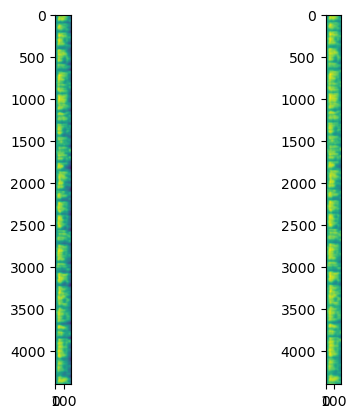

In [12]:
#subplot(1,2,1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.log(spec1))
ax[1].imshow(np.log(spec2))
plt.show()



In [28]:
eng.quit()